In [ ]:


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
# Load the dataset
data = pd.read_csv(r"/content/student_exam_data.csv")


# Display the first few rows of the dataset
print(data.head())



   Study Hours  Previous Exam Score  Pass/Fail
0     4.370861            81.889703          0
1     9.556429            72.165782          1
2     7.587945            58.571657          0
3     6.387926            88.827701          1
4     2.404168            81.083870          0


In [ ]:
# Prepare the features and target variable
X = data[['Study Hours', 'Previous Exam Score']]
y = data['Pass/Fail']  # Assuming 'Pass' is the target variable (1 for Pass, 0 for Fail)




Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        64
           1       1.00      0.89      0.94        36

    accuracy                           0.96       100
   macro avg       0.97      0.94      0.96       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix:
[[64  0]
 [ 4 32]]


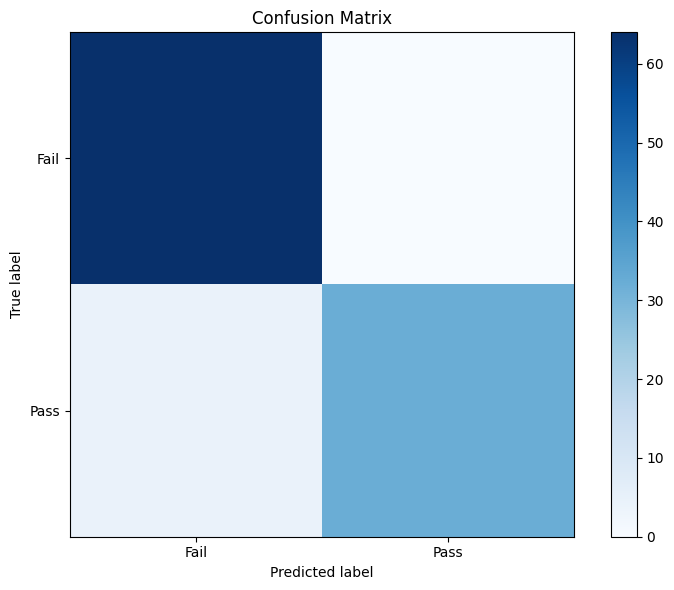

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Function to plot confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Fail', 'Pass'])
    plt.yticks(tick_marks, ['Fail', 'Pass'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)
plt.show()